什么是numpy，什么是Pandas

<p style="text-align:justify">一个用python实现的科学计算包。包括：
1、一个强大的N维数组对象Array；
2、比较成熟的（广播）函数库；
3、用于整合C/C++和Fortran代码的工具包；
4、实用的线性代数、傅里叶变换和随机数生成函数。numpy和稀疏矩阵运算包scipy配合使用更加方便。</p><br>


<p style="text-align:justify">NumPy越来越成为一个被其他库所使用核心库，这些库通常具有更优雅的接口。因此，Pandas成为了处理数据所主要使用的库。它可以以各种格式（包括数据库）输入输出数据、执行join以及其他SQL类似的功能来重塑数据、熟练地处理缺失值、支持时间序列、拥有基本绘图功能和统计功能，等等还有很多。对它所有的特性来说，肯定有一个学习曲线，但我强烈去建议你先看一下大部分文档。你所投入的时间将使你的数据再加工过程更高效，这会带来上千倍的回报。这里有一些快速技巧会让你胃口大开的。</p>

## 1、numpy基础

## （1）创建多为数组
- 从list

In [2]:
import numpy as np
a = np.array([1,2,3,4])

a

array([1, 2, 3, 4])

In [14]:
b = np.array([[1, 2], [3, 4]])

b

array([[1, 2],
       [3, 4]])

In [8]:
type(a), type(b)

(numpy.ndarray, numpy.ndarray)

In [12]:
a.shape

(4,)

In [15]:
b.shape

(2, 2)

In [16]:
a.size

4

In [17]:
b.size

4

So far the `numpy.ndarray` looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

### Using array-generating functions
#### arange

In [20]:
x = np.arange(0, 10, 1) # arguments: start, stop, step
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
x = np.arange(-1, 1 ,0.1)

x

array([ -1.00000000e+00,  -9.00000000e-01,  -8.00000000e-01,
        -7.00000000e-01,  -6.00000000e-01,  -5.00000000e-01,
        -4.00000000e-01,  -3.00000000e-01,  -2.00000000e-01,
        -1.00000000e-01,  -2.22044605e-16,   1.00000000e-01,
         2.00000000e-01,   3.00000000e-01,   4.00000000e-01,
         5.00000000e-01,   6.00000000e-01,   7.00000000e-01,
         8.00000000e-01,   9.00000000e-01])

#### linspace and logspace

In [32]:
m = np.linspace(0,100,5)
m

array([   0.,   25.,   50.,   75.,  100.])

In [33]:
m = np.linspace(0, 10, 25)
m

array([  0.        ,   0.41666667,   0.83333333,   1.25      ,
         1.66666667,   2.08333333,   2.5       ,   2.91666667,
         3.33333333,   3.75      ,   4.16666667,   4.58333333,
         5.        ,   5.41666667,   5.83333333,   6.25      ,
         6.66666667,   7.08333333,   7.5       ,   7.91666667,
         8.33333333,   8.75      ,   9.16666667,   9.58333333,  10.        ])

#### random data随机数

In [40]:
# 创建 [0,1]的随机数
x = np.random.rand(5,5)
x

array([[ 0.55793884,  0.65614899,  0.90358459,  0.89966917,  0.79769376],
       [ 0.9773178 ,  0.55965015,  0.21457739,  0.92096863,  0.99039763],
       [ 0.24148184,  0.23988432,  0.13787513,  0.7740299 ,  0.0219651 ],
       [ 0.00735278,  0.68046557,  0.72548921,  0.12429998,  0.71623602],
       [ 0.80163532,  0.72140428,  0.02725947,  0.03338477,  0.86064254]])

In [47]:
# 标准正态分布随机数
x = np.random.randn(5,5)
x

array([[-2.22599346,  0.37122733, -0.68675555,  0.36248206,  0.22747914],
       [ 0.38984537, -1.44828148, -0.50357955,  1.07548453,  0.72734662],
       [-0.96268483, -1.18406333,  1.58532971,  0.70775886, -1.05859499],
       [-1.65367614,  1.47943499,  1.27160223,  1.44616263,  1.5249029 ],
       [-0.33138824, -0.54578266,  2.61232667, -0.74836596,  0.07748835]])

## （2）操作数组

### 索引Indexing

In [52]:
x = np.random.randn(4,4)
x

array([[ 0.05611111,  0.19181972,  2.0568339 , -2.01138076],
       [ 0.94208841, -2.12608428,  0.98699585,  1.53798957],
       [-0.10042411, -0.26277682,  1.09779522,  1.78085895],
       [-0.92662028, -0.71361753,  0.09485571, -2.04911258]])

In [51]:
x.shape

(4, 4)

In [54]:
x[0]

array([ 0.05611111,  0.19181972,  2.0568339 , -2.01138076])

In [57]:
x[0,:]

array([ 0.05611111,  0.19181972,  2.0568339 , -2.01138076])

In [55]:
x[0,0]

0.056111108412925784

In [56]:
x[:,0]

array([ 0.05611111,  0.94208841, -0.10042411, -0.92662028])

In [58]:
x[0,0] = 1

In [59]:
x

array([[ 1.        ,  0.19181972,  2.0568339 , -2.01138076],
       [ 0.94208841, -2.12608428,  0.98699585,  1.53798957],
       [-0.10042411, -0.26277682,  1.09779522,  1.78085895],
       [-0.92662028, -0.71361753,  0.09485571, -2.04911258]])

### Index slicing
> M[lower:upper:step]

In [69]:
#选择多行
x[[1,2]]

array([[ 0.94208841, -2.12608428,  0.98699585,  1.53798957],
       [-0.10042411, -0.26277682,  1.09779522,  1.78085895]])

In [70]:
#选择多行
x[[1,3]]

array([[ 0.94208841, -2.12608428,  0.98699585,  1.53798957],
       [-0.92662028, -0.71361753,  0.09485571, -2.04911258]])

In [74]:
x[[1,3],1]

array([-2.12608428, -0.71361753])

## （3）运算

In [81]:
a + 2

array([[ 3.36896957,  2.24636512,  5.47018141,  0.97434696],
       [ 1.70817338,  2.42314689,  1.17005126,  1.23717866],
       [ 0.97674192,  2.22273947,  2.26781226,  2.02268298]])

In [41]:
-(0.5*a + 1) ** 2

array([[-2.32072802, -0.69379029, -0.03022487, -0.9807514 ],
       [-3.23159228, -1.12651683, -0.72444752, -1.31825903],
       [-0.18135613, -1.46409726, -2.75831618, -1.47973497]])

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

Additionally there are Boolean/bitwise operators; we will explore these in [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb).

### python内置的函数

#### 绝对值函数

In [43]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

In [44]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [45]:
np.abs(x)

array([2, 1, 0, 1, 2])

#### 求和函数

In [62]:
asum = np.random.random(20)
asum

array([ 0.29784291,  0.18646582,  0.82390611,  0.01108067,  0.4653784 ,
        0.84139635,  0.63426492,  0.12512704,  0.32342143,  0.76273929,
        0.39002692,  0.29803656,  0.07380009,  0.75821399,  0.50633128,
        0.25962046,  0.34257321,  0.41142503,  0.06821955,  0.87368309])

In [63]:
sum(asum)

8.4535531111770954

In [64]:
np.sum(asum)

8.4535531111770972

In [65]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

1 loop, best of 3: 190 ms per loop
1000 loops, best of 3: 1.61 ms per loop


#### 求最大值、最小值

In [66]:
min(big_array), max(big_array)

(4.7578763695543813e-07, 0.99999877774778911)

In [67]:
np.min(big_array), np.max(big_array)

(4.7578763695543813e-07, 0.99999877774778911)

In [68]:
%timeit min(big_array)
%timeit np.min(big_array)

10 loops, best of 3: 92.6 ms per loop
1000 loops, best of 3: 620 µs per loop


In [69]:
print(big_array.min(), big_array.max(), big_array.sum())

(4.7578763695543813e-07, 0.99999877774778911, 499902.11167857796)


In [70]:
M = np.random.random((3, 4))
print(M)

[[ 0.97685819  0.60909093  0.73731731  0.64325545]
 [ 0.80625318  0.24539689  0.25147962  0.87991413]
 [ 0.49682982  0.37252776  0.2659812   0.20234444]]


In [71]:
M.sum()

6.4872489075868822

In [72]:
M.min(axis=0)

array([ 0.49682982,  0.24539689,  0.25147962,  0.20234444])

In [73]:
M.max(axis=1)

array([ 0.97685819,  0.87991413,  0.49682982])

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute median of elements                    |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

#### 三角函数

In [53]:
ar = np.linspace(0, np.pi, 3)

In [54]:
print("ar      = ", ar)
print("sin(ar) = ", np.sin(ar))
print("cos(ar) = ", np.cos(ar))
print("tan(ar) = ", np.tan(ar))

('ar      = ', array([ 0.        ,  1.57079633,  3.14159265]))
('sin(ar) = ', array([  0.00000000e+00,   1.00000000e+00,   1.22464680e-16]))
('cos(ar) = ', array([  1.00000000e+00,   6.12323400e-17,  -1.00000000e+00]))
('tan(ar) = ', array([  0.00000000e+00,   1.63312394e+16,  -1.22464680e-16]))


In [55]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

('x         = ', [-1, 0, 1])
('arcsin(x) = ', array([-1.57079633,  0.        ,  1.57079633]))
('arccos(x) = ', array([ 3.14159265,  1.57079633,  0.        ]))
('arctan(x) = ', array([-0.78539816,  0.        ,  0.78539816]))


#### 指数与对数

In [74]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

('x     =', [1, 2, 3])
('e^x   =', array([  2.71828183,   7.3890561 ,  20.08553692]))
('2^x   =', array([ 2.,  4.,  8.]))
('3^x   =', array([ 3,  9, 27]))


In [57]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

('x        =', [1, 2, 4, 10])
('ln(x)    =', array([ 0.        ,  0.69314718,  1.38629436,  2.30258509]))
('log2(x)  =', array([ 0.        ,  1.        ,  2.        ,  3.32192809]))
('log10(x) =', array([ 0.        ,  0.30103   ,  0.60205999,  1.        ]))


In [58]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

('exp(x) - 1 =', array([ 0.        ,  0.0010005 ,  0.01005017,  0.10517092]))
('log(1 + x) =', array([ 0.        ,  0.0009995 ,  0.00995033,  0.09531018]))


### 数组的广播运算

什么是广播？

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [40]:
a = np.random.randn(3,4)
a

array([[ 1.04678717, -0.33411851, -2.34770605, -0.01934213],
       [ 1.59532601,  0.12274994, -0.29771034,  0.29630924],
       [-1.14828144,  0.41999774,  1.32163585,  0.43288715]])

In [77]:
b = np.random.randn(3,4)
b

array([[-0.48916979,  0.32527622,  0.67525757, -0.56233506],
       [-0.0261248 , -0.88834109, -0.40012379, -2.43480168],
       [ 0.76188381,  0.04601983,  0.12227417,  0.63822871]])

In [78]:
a + b

array([[ 0.87979978,  0.57164134,  4.14543898, -1.5879881 ],
       [-0.31795142, -0.4651942 , -1.23007253, -3.19762303],
       [-0.26137426,  0.2687593 ,  0.39008643,  0.6609117 ]])

In [79]:
a * b

array([[-0.66965856,  0.08013671,  2.34326626,  0.57676066],
       [ 0.00762391, -0.37589877,  0.33208223,  1.85731869],
       [-0.77960377,  0.01025043,  0.03274652,  0.01447693]])

In [80]:
a / b

array([[ -2.79855707,   0.75740282,   5.13904853,   1.82391801],
       [ 11.17048292,  -0.4763338 ,   2.07422995,   0.31329917],
       [ -1.34306315,   4.84007556,   2.19026028,   0.03554053]])

![Broadcasting Visual](./figures/02.05-broadcasting.png)

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

### Broadcasting example 1

Let's look at adding a two-dimensional array to a one-dimensional array:

In [95]:
import numpy as np
M = np.ones((2, 3))
a = np.arange(3)

Let's consider an operation on these two arrays. The shape of the arrays are

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

We see by rule 1 that the array ``a`` has fewer dimensions, so we pad it on the left with ones:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and we see that the final shape will be ``(2, 3)``:

In [96]:
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

### Broadcasting example 2

Let's take a look at an example where both arrays need to be broadcast:

In [101]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Again, we'll start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1 says we must pad the shape of ``b`` with ones:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible. We can see this here:

In [102]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [91]:
np.arange(3).reshape((1, 3))

array([[0, 1, 2]])

In [92]:
np.arange(3).reshape((3, 1))

array([[0],
       [1],
       [2]])

### Broadcasting example 3

Now let's take a look at an example in which the two arrays are not compatible:

In [97]:
M = np.ones((3, 2))
a = np.arange(3)

In [99]:
np.ones((3, 2))

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [105]:
np.arange(3)

array([0, 1, 2])

This is just a slightly different situation than in the first example: the matrix ``M`` is transposed.
How does this affect the calculation? The shape of the arrays are

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Again, rule 1 tells us that we must pad the shape of ``a`` with ones:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

By rule 2, the first dimension of ``a`` is stretched to match that of ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [98]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

## 数组组合

In [5]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = [99, 99, 99]
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

In [7]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [8]:
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [9]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [10]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

Similary, ``np.dstack`` will stack arrays along the third axis.

In [23]:
x = np.random.randn(2,3)
x

array([[ 0.22698367,  0.81673875,  2.24107123],
       [ 0.8581119 , -0.74274038, -2.11975751]])

In [20]:
x.ndim

2

## 数组分割（与数组组合相反）

In [3]:
import numpy as np
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 6])
print(x1, x2, x3)

(array([1, 2, 3]), array([99, 99,  3]), array([2, 1]))


In [21]:
import numpy as np
x = [1, 2, 3, 99, 99, 3, 2, 1]
np.split(x, [2, 3, 5])

[array([1, 2]), array([3]), array([99, 99]), array([3, 2, 1])]

###### grid = np.arange(16).reshape((4, 4))
grid

In [35]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [36]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


In [26]:
grid = np.arange(16)
grid

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [27]:
grid.reshape((4, 4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [28]:
grid

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [99]:
a

array([[ 1.36896957,  0.24636512,  3.47018141, -1.02565304],
       [-0.29182662,  0.42314689, -0.82994874, -0.76282134],
       [-1.02325808,  0.22273947,  0.26781226,  0.02268298]])

In [104]:
a.flatten()

array([ 1.36896957,  0.24636512,  3.47018141, -1.02565304, -0.29182662,
        0.42314689, -0.82994874, -0.76282134, -1.02325808,  0.22273947,
        0.26781226,  0.02268298])

## Comparisons, Masks, and Boolean Logic
### Example: Counting Rainy Days

02.06-Boolean-Arrays-and-Masks.ipynb

In [111]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('./data/numpy-science-data/Seattle2014.csv')['PRCP'].values
inches = rainfall  # 1/10mm -> inches
inches.shape

(365,)

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

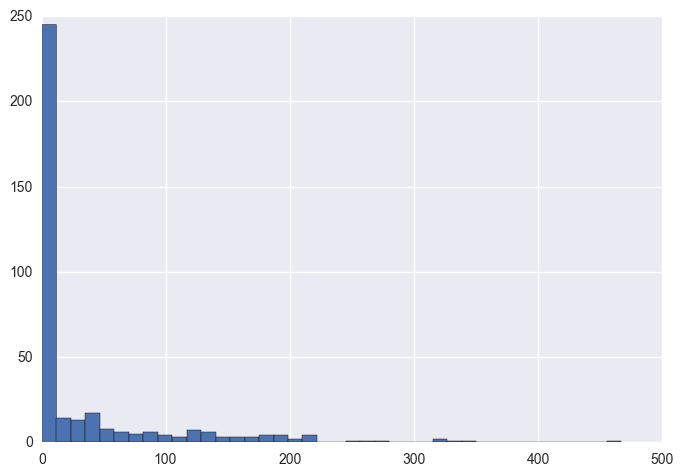

In [113]:
plt.hist(inches, 40);

## 数组的排序

In [123]:
x = np.array([2, 1, 4, 3, 5])

In [119]:
np.sort(x)

array([1, 2, 3, 4, 5])

In [130]:
x

array([2, 1, 4, 3, 5])

In [120]:
sorted(x)

[1, 2, 3, 4, 5]

In [129]:
x

array([2, 1, 4, 3, 5])

#### 对排序进行改变

In [126]:
x.sort()
print x

[1 2 3 4 5]


`np.argsort(x)` 返回数组排序后的索引值

In [131]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print i

[1 0 3 2 4]


In [132]:
x[i]

array([1, 2, 3, 4, 5])

#### 多维数组索引

In [134]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print X

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [137]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [136]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

#### 部分排序Partial Sorts: Partitioning

In [141]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [142]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])